# Reseaux de neurones simples a une couches

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm 

In [140]:
def initialisation(n0,n1,n2):
    W1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1,1)

    W2 = np.random.randn(n2,n1)
    b2 = np.random.randn(n2,1)

    parameteres={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return parameteres

In [141]:
def froward_propagation(parametres,X):

    W1 = parametres['W1']
    b1 = parametres['b1']

    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X)+b1
    A1 = 1/(1+np.exp(-Z1))

    Z2 = W2.dot(A1)+b2
    A2 = 1/(1+np.exp(-Z2))

    activations={
        'A1' : A1,
        'A2' : A2
    }

    return activations

In [142]:
def backward_propagation(parametres,X,activations,y):
    A1 = activations['A1']
    A2 = activations['A2']

    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = (A2-y)
    dW2 = (1/m)*dZ2.dot(A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1,keepdims =True)
    dZ1 = np.dot(W2.T,dZ2)*A1*(1-A1)
    dW1 = (1/m)*dZ1.dot(X.T)
    db1 = (1/m)*np.sum(dZ1,axis = 1,keepdims =True)

    gradients = {
        "dW1" : dW1,
        "dW2" : dW2,
        "db1" : db1,
        "db2" : db2
    }

    return gradients
    





In [143]:
def update(gradients,parametres,learning_rate):
    
    W1 = parametres['W1']
    dW1 = gradients['dW1']
    b1 = parametres['b1']
    db1 = gradients['db1']

    W2 = parametres['W2']
    dW2 = gradients['dW2']
    b2 = parametres['b2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2

    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2

    parameteres={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2
    }
    return parameteres

In [144]:
def predict(X,parametres):
    activation = froward_propagation(parametres,X)
    A2 = activation['A2']
    return A2 >= 0.5

In [158]:
def log_loss(y,activation):
    epsilon = 1e-15
    A2 = activation['A2']
    return(-1/y.shape[1])*np.sum(y*np.log(A2+ epsilon)+(1-y)*np.log(1-A2+ epsilon))

In [159]:
def neurale_network(X_train,y_train,n1,n_inter=1000,learning_rate=0.1):
    
    n0 =X_train.shape[0]
    n2 = y_train.shape[0]
    #initialisation
    parametres = initialisation(n0,n1,n2)
    train_loss = []
    train_acc = []

    for i in tqdm(range(n_inter)):
        activation = froward_propagation(parametres,X_train)
        gradient = backward_propagation(parametres,X_train,activation,y_train)
        parametres = update(gradient,parametres,learning_rate)

        if i%10 == 0:
            train_loss.append(log_loss(y_train,activation))
            y_pred = predict(X_train,parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss'); plt.legend()

    plt.subplot(1, 2, 2)          
    plt.plot(train_acc, label='train acc'); plt.legend()
    plt.show()

    return(parametres)


    

# On recree un model a une couche pour comparer les resultats

In [160]:
#initialisation une couche
def initialisation1(X):
    W = np.random.randn(X.shape[1],1)
    b =np.random.randn(1)
    return W,b

In [161]:
#model
def model1(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

In [162]:
#fonction cost 
def log_lose1(A,y):
    epsilon = 1e-15
    A = np.array(A) 
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [163]:
#fonction gradient 
def gradient1(A,X,y):
    dW = (1/len(y))*X.T.dot(A-y)
    db = (1/len(y))*sum(A-y)
    return dW,db

In [164]:
#fonction update 
def update1(W,b,dW,db, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W,b

In [165]:
#defintion de la fonction de prediction
def pred1(X,W,b):
    A = model1(X,W,b)
    return A >= 0.5

In [166]:
# defition du artificial neuron
#  
def neurone_artificiel1(X_train,y_train, n_inter, learning_rate=0.001):
    W,b  = initialisation1(X_train)
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    for i in tqdm(range(n_inter)):
        #activation 
        A = model1(X_train,W,b)

        if i %10 == 0:
            #Train
            #calcule du cout
            train_loss.append(log_lose1(A, y_train))
            y_pred = pred1(X_train,W,b)
            train_acc.append(accuracy_score(y_train, y_pred))


        # mis a jour
        dW ,db = gradient1(A,X_train,y_train)
        W,b = update1(W,b,dW,db,learning_rate)
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    
    return(W,b)

### On crée deux data set un lineaire et l'autre non pour voire plus clairement la difference de performence de ces deux models 

dimension de X1 : (100, 2)
dimensio de y1 : (100, 1)
dimension de X (2, 100)
dimension de y (1, 100)


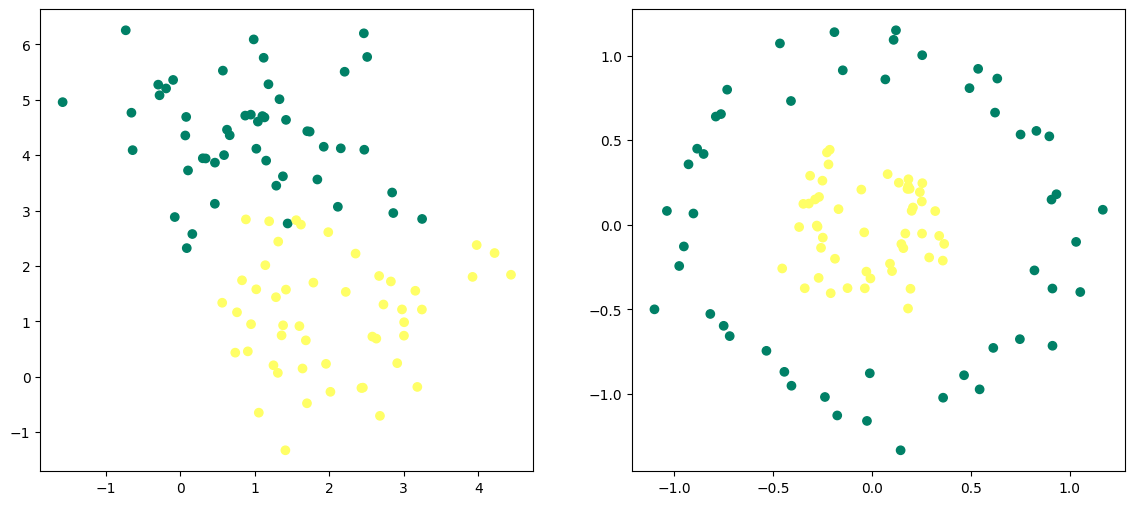

In [167]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
X1, y1 = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y1 = y1.reshape((y1.shape[0],1))

X,y = make_circles(n_samples=100, noise=0.1,factor=0.3,random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimension de X1 :' , X1.shape)
print('dimensio de y1 :', y1.shape)

print('dimension de X',X.shape)
print('dimension de y', y.shape)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X1[:,0],X1[:,1],label='dataset lineaire', c=y1, cmap='summer')

plt.subplot(1, 2, 2)
plt.scatter(X[0,:],X[1,:],label='data set non lineaire',c=y,cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 10713.89it/s]


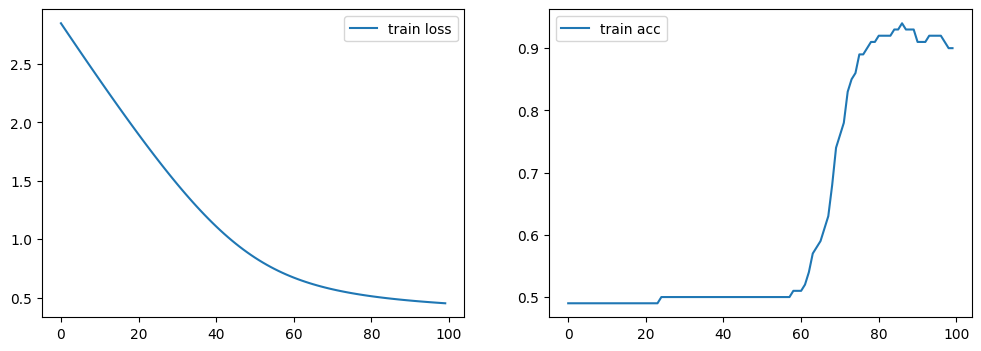

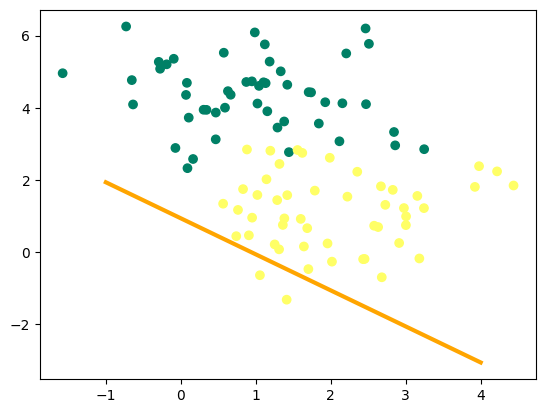

In [171]:
W1,b1 = neurone_artificiel1(X1,y1,learning_rate=0.001, n_inter=1000)
x0 = np.linspace(-1,4,100)
x1 = -(b1+W1[1]*x0)/W1[1]
plt.scatter(X1[:,0],X1[:,1],label='dataset', c=y1, cmap='summer')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 13662.41it/s]


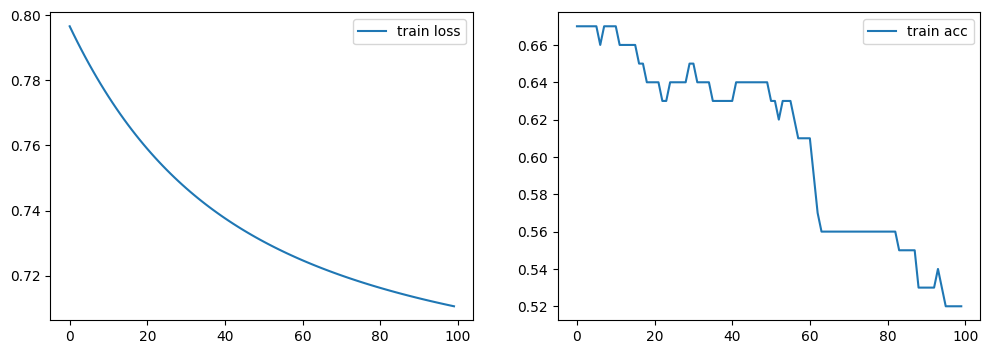

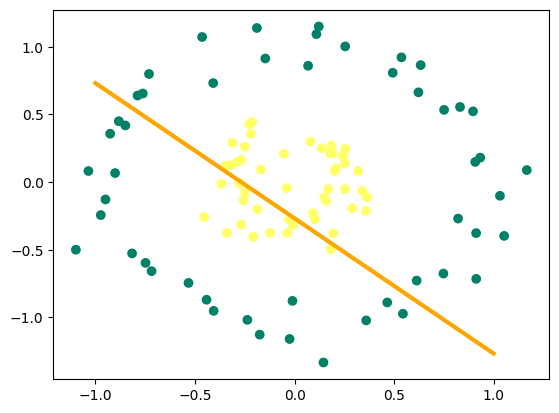

In [169]:
W0,b0 = neurone_artificiel1(X.T,y.T,learning_rate=0.01, n_inter=1000)
x0 = np.linspace(-1,1,100)
x1 = -(b0+W0[1]*x0)/W0[1]
plt.scatter(X.T[:,0],X.T[:,1],label='dataset', c=y.T, cmap='summer')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()

In [175]:
def plot_decision_boundary(params, X, y, step=300):
    # 1) grille
    x_min, x_max = X[0,:].min()-0.5, X[0,:].max()+0.5
    y_min, y_max = X[1,:].min()-0.5, X[1,:].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, step),
        np.linspace(y_min, y_max, step)
    )
    grid = np.vstack([xx.ravel(), yy.ravel()])  # (2, N)

    # 2) proba du réseau
    acts = froward_propagation(params, grid)    # dict avec 'A2' shape (1, N)
    proba = acts['A2'].reshape(xx.shape)

    # 3) affichage: régions + frontière p=0.5
    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, (proba >= 0.5).astype(int), alpha=0.35, cmap='summer')
    plt.contour(xx, yy, proba, levels=[0.5], colors='red', linewidths=3)  # frontière
    plt.scatter(X[0,:], X[1,:], c=y.flatten(), cmap='summer', edgecolors='k')
    plt.axis('equal'); plt.title('Frontière de décision'); plt.show()


100%|██████████| 10000/10000 [00:00<00:00, 16445.40it/s]


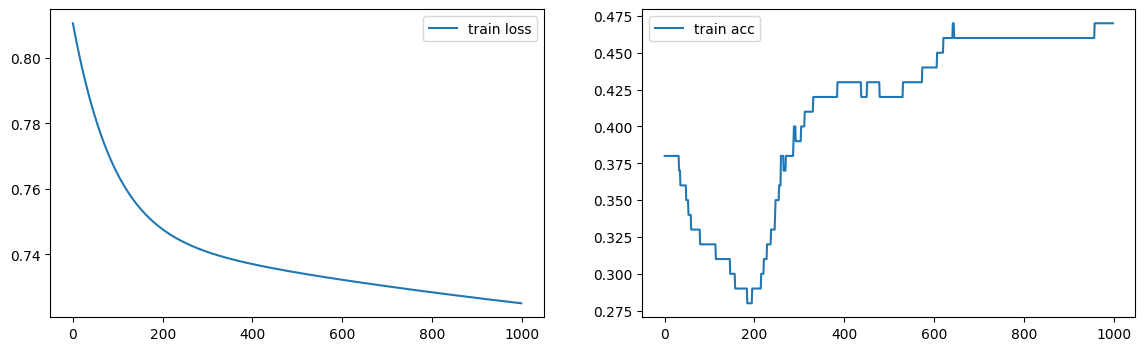

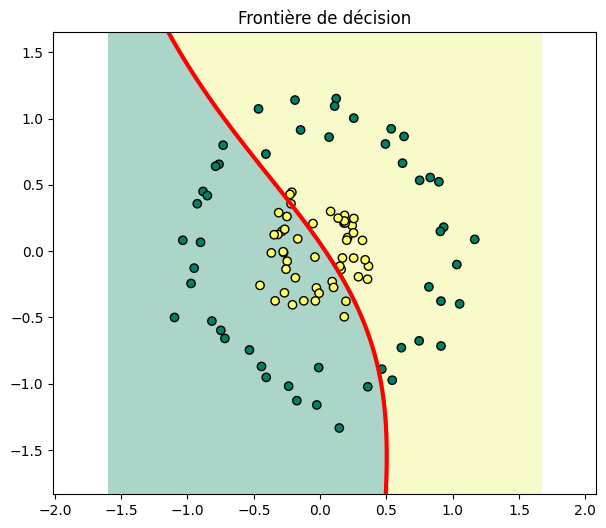

In [178]:
params = neurale_network(X, y, n1=6, n_inter=10000, learning_rate=0.001)
plot_decision_boundary(params, X, y)

